**Loading Libraries**

First, we need to load the libraries that will be used through the exercise, including the `diversedata` package.

In [1]:
library(diversedata)
library(tidyverse) 
library(scales)
library(cowplot)
library(MASS)
library(broom)
library(brant)
library(knitr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




# 1 Data Cleaning & Processing

First, we can load our data set (`hcmst` from `diversedata` package), select our specific variables of intereset and remove NAs from our data set.

In [2]:
# Reading Data
hcmst <- hcmst

# Review total rows
nrow(hcmst)

[1] 1328

In [3]:
# Select features of interest and removing NA
hcmst <- hcmst |> 
  dplyr::select(
    same_sex_couple, 
    sex_frequency, 
    flirts_with_partner, 
    fights_with_partner,
    inc_change_during_pandemic, 
    subject_had_covid, 
    partner_had_covid, 
    subject_vaccinated, 
    partner_vaccinated, 
    agree_covid_approach, 
    relationship_quality) |> 
  drop_na()

# Remaining row count.
nrow(hcmst)

[1] 1220

# 2 Variable Encoding

We can note that our categorical response follows a specific order. For this reason, we require a model that suits ordinal responses. Hence, we will be using an Ordinal Logistic regression model framework.

In order to do so, we need to make sure that our response variable is encoded as an ordered factor. We will also take this opportunity to encode our explanatory variables as factors (and ordered factors) as needed.

First, we can encode our nominal categorical explanatory variables:

In [4]:
hcmst <- hcmst |> 
  mutate(same_sex_couple = as_factor(same_sex_couple)|> 
           fct_recode("No" = "no", "Yes" = "yes"))

levels(hcmst$same_sex_couple)


[1] "No"  "Yes"

Then, we can encode all our ordinal, categorical, explanatory, behavioral variables:


In [5]:
hcmst <- hcmst |> 
  mutate(sex_frequency = as.ordered(sex_frequency)) |> 
  mutate(sex_frequency = fct_relevel(sex_frequency, 
      c("once_a_month_or_less", "2_to_3_times_a_month", 
        "once_or_twice_a_week", "3_to_6_times_a_week", 
        "once_or_more_a_day")))

levels(hcmst$sex_frequency)

[1] "once_a_month_or_less" "2_to_3_times_a_month" "once_or_twice_a_week"
[4] "3_to_6_times_a_week"  "once_or_more_a_day"

In [6]:

hcmst <- hcmst |> 
  mutate(flirts_with_partner = as.ordered(flirts_with_partner)) |> 
  mutate(flirts_with_partner = fct_relevel(flirts_with_partner, 
      c("never", "less_than_once_a_month", 
        "1_to_3_times_a_month", "once_a_week", 
        "a_few_times_a_week", "every_day")))

levels(hcmst$flirts_with_partner)


[1] "never"                  "less_than_once_a_month" "1_to_3_times_a_month"  
[4] "once_a_week"            "a_few_times_a_week"     "every_day"

In [7]:
hcmst <- hcmst |> 
  mutate(fights_with_partner = as.ordered(fights_with_partner)) |> 
  mutate(fights_with_partner = fct_relevel(fights_with_partner, 
      c("0_times", "1_time", "2_times", "3_times", "4_times", 
        "5_times", "6_times", "7_or_more_times")))

levels(hcmst$sex_frequency)

[1] "once_a_month_or_less" "2_to_3_times_a_month" "once_or_twice_a_week"
[4] "3_to_6_times_a_week"  "once_or_more_a_day"

Then, we can encode all our ordinal, categorical, explanatory, COVID-19-related variables:

In [8]:
hcmst <- hcmst |> 
  mutate(inc_change_during_pandemic = as.ordered(inc_change_during_pandemic)) |> 
  mutate(inc_change_during_pandemic = fct_relevel(inc_change_during_pandemic, 
      c("much_worse", "worse", "no_change", "better", "much_better")))

levels(hcmst$inc_change_during_pandemic)

[1] "much_worse"  "worse"       "no_change"   "better"      "much_better"

In [9]:

hcmst <- hcmst |> 
  mutate(subject_had_covid = as_factor(subject_had_covid))

levels(hcmst$subject_had_covid)


[1] "no"  "yes"

In [10]:
hcmst <- hcmst |> 
  mutate(partner_had_covid = as_factor(partner_had_covid))

levels(hcmst$partner_had_covid)

[1] "yes" "no"

In [11]:
hcmst <- hcmst |> 
  mutate(subject_vaccinated = as.ordered(subject_vaccinated)) |> 
  mutate(subject_vaccinated = fct_relevel(subject_vaccinated, 
      c("not_vaccinated", "partially_vaccinated", 
        "fully_vaccinated_no_booster", "fully_vaccinated_and_booster")))

levels(hcmst$subject_vaccinated)

[1] "not_vaccinated"               "partially_vaccinated"        
[3] "fully_vaccinated_no_booster"  "fully_vaccinated_and_booster"

In [12]:
hcmst <- hcmst |> 
  mutate(partner_vaccinated = as.ordered(partner_vaccinated)) |> 
  mutate(partner_vaccinated = fct_relevel(partner_vaccinated, 
      c("not_vaccinated", "partially_vaccinated", 
        "fully_vaccinated_no_booster", "fully_vaccinated_and_booster")))

levels(hcmst$partner_vaccinated)

[1] "not_vaccinated"               "partially_vaccinated"        
[3] "fully_vaccinated_no_booster"  "fully_vaccinated_and_booster"

In [13]:
hcmst <- hcmst |> 
  mutate(agree_covid_approach = as.ordered(agree_covid_approach)) |> 
  mutate(agree_covid_approach = fct_relevel(agree_covid_approach, 
      c("completely_disagree", "mostly_disagree", 
        "mostly_agree", "completely_agree")))

levels(hcmst$agree_covid_approach)

[1] "completely_disagree" "mostly_disagree"     "mostly_agree"       
[4] "completely_agree"

Finally, we can encode our target variable:

In [14]:
hcmst <- hcmst |> 
  mutate(relationship_quality = as.ordered(relationship_quality)) |> 
  mutate(relationship_quality = fct_relevel(relationship_quality, 
      c("very_poor", "poor", "fair", "good", "excellent")))

levels(hcmst$sex_frequency)

[1] "once_a_month_or_less" "2_to_3_times_a_month" "once_or_twice_a_week"
[4] "3_to_6_times_a_week"  "once_or_more_a_day"

# 3 Exploratory Data Analysis

We will visualize histograms charts for our different categorical variables. But first, we will see how different groups were sampled in the survey and how different these samples are for same sex couples.

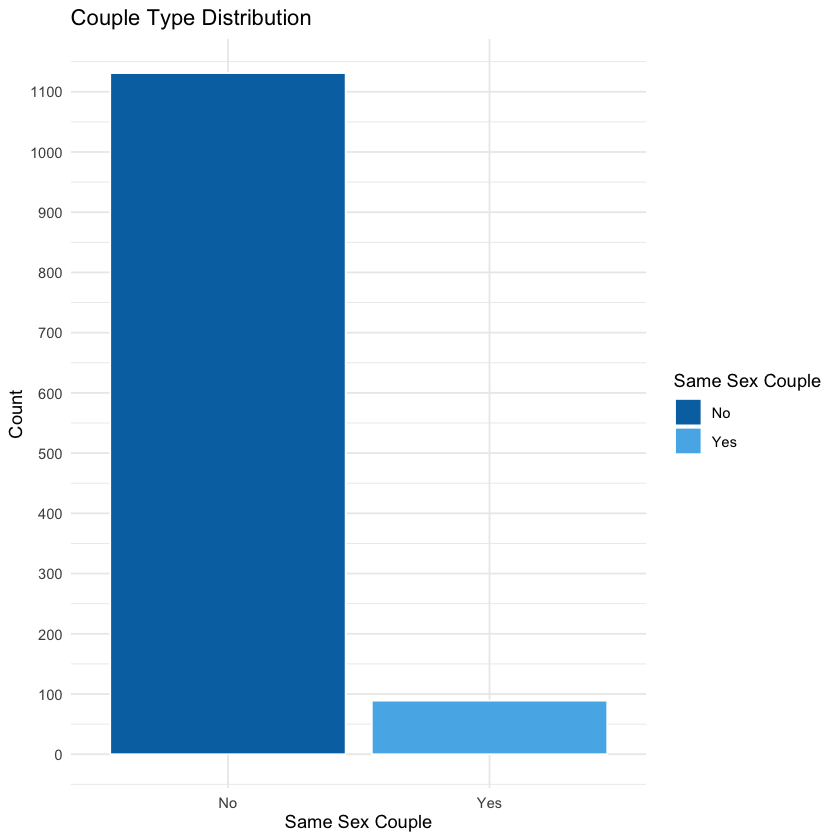

In [15]:
# We'll use a color blind friendly pallete:
cbPalette <- c("#0072B2", "#56B4E9", "#999999", "#E69F00", "#009E73", "#F0E442", "#D55E00", "#CC79A7")

ggplot(hcmst, aes(x = same_sex_couple, fill = same_sex_couple)) +
  geom_bar(position = "dodge", color = "white") +
  labs(
    title = "Couple Type Distribution",
    x = "Same Sex Couple",
    y = "Count",
    fill = "Same Sex Couple"
  ) +
  theme_minimal() +
  scale_fill_manual(values = cbPalette) +
  scale_y_continuous(breaks = seq(0, 1200, by = 100))

It can be noted that the sample of `same_sex_couples` is smaller that that of different-sex couples. In the original study, same sex couples were oversampled. For more information on how the survey data was collected, refer to the [original data set](https://data.stanford.edu/hcmst2017).

To explore our other variables, we will create a function that will be used for visualization. Since we know that the samples for different types of couples are different, we will use relative frequency in our visualizations.

In [16]:
histogram_plot <- function(data, y_var, facet, plot_title = "Relative Frequency by Category", label_map) {
  data_long <- data |> 
    dplyr::select(all_of(c(y_var, facet))) |> 
    pivot_longer(cols = all_of(y_var), names_to = "var", values_to = "value") |> 
    mutate(value = recode(value, !!!label_map)) |> 
    count(var, value, facet_value = .data[[facet]]) |> 
    group_by(facet_value) |> 
    mutate(prop = n / sum(n)) |> 
    ungroup()

  ggplot(data_long, aes(x = prop, y = value, fill = facet_value)) +
    geom_bar(stat = "identity", position = "dodge", color = "white") +
    labs(
      title = plot_title,
      x = "Relative Frequency",
      y = NULL,
      fill = "Same Sex Couple"
    ) +
    theme_minimal() +
    scale_fill_manual(values = cbPalette)
}

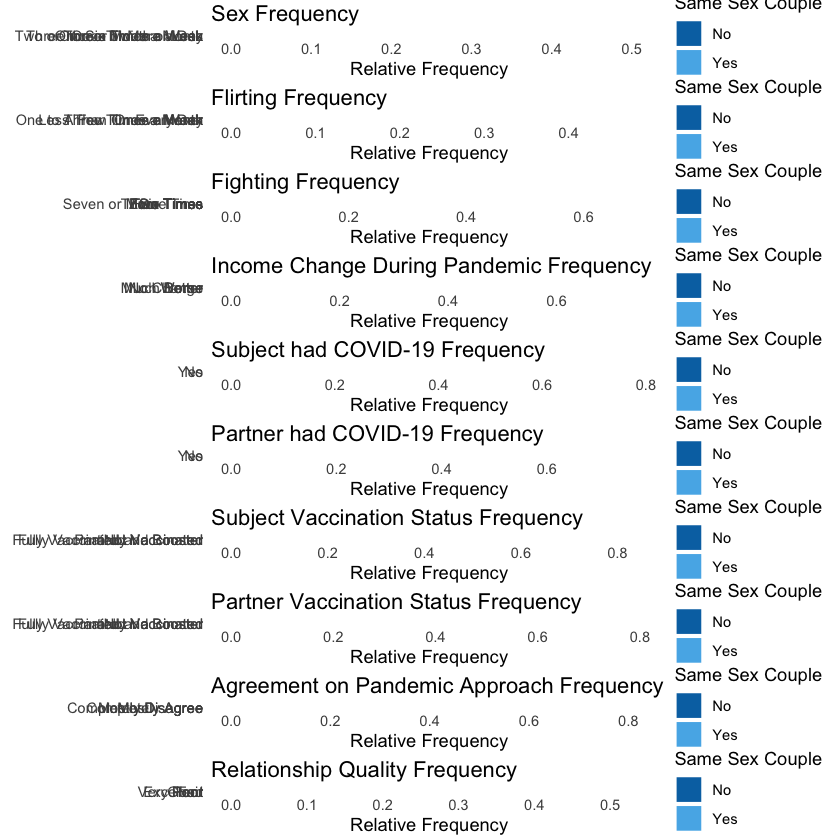

In [17]:
sex_freq_labels <- c(
  "once_a_month_or_less" = "Once a Month or Less",
  "2_to_3_times_a_month" = "Two or Three Times a Month",
  "once_or_twice_a_week" = "Once or Twice a Week",
  "3_to_6_times_a_week" = "Three to Six Times a Week",
  "once_or_more_a_day" = "Once or More a Day"
)

hist_sex_freq <- histogram_plot(hcmst, "sex_frequency", "same_sex_couple", 
  plot_title = "Sex Frequency", label_map = sex_freq_labels)

flirt_freq_labels <- c(
  "never" = "Never",
  "less_than_once_a_month" = "Less Than Once a Month",
  "1_to_3_times_a_month" = "One to Three Times a Month",
  "once_a_week" = "Once a Week",
  "a_few_times_a_week" = "A Few Times a Week",
  "every_day" = "Every Day" 
)

hist_flirt_freq <- histogram_plot(hcmst, "flirts_with_partner", 
  "same_sex_couple", plot_title = "Flirting Frequency",
  label_map = flirt_freq_labels)

fight_freq_labels <- c(
  "0_times" = "Zero Times",
  "1_time" = "One Time",
  "2_times" = "Two Times",
  "3_times" = "Three Times",
  "4_times" = "Four Times",
  "5_times" = "Five Times",
  "6_times" = "Six Times",
  "7_or_more_times" = "Seven or More Times"
)

hist_fight_freq <- histogram_plot(hcmst, "fights_with_partner", 
  "same_sex_couple", plot_title = "Fighting Frequency",
  label_map = fight_freq_labels)

inc_labels <- c(
  "much_worse" = "Much Worse",
  "worse" = "Worse",
  "no_change" = "No Change",
  "better" = "Better",
  "much_better" = "Much Better"
)

hist_inc_change_freq <- histogram_plot(hcmst, "inc_change_during_pandemic",
  "same_sex_couple", plot_title = "Income Change During Pandemic Frequency",
  label_map = inc_labels)

yes_no_label <- c("no" = "No", "yes" = "Yes")

hist_sub_covid_freq <- histogram_plot(hcmst, "subject_had_covid", 
  "same_sex_couple", plot_title = "Subject had COVID-19 Frequency",
  label_map = yes_no_label)

hist_par_covid_freq <- histogram_plot(hcmst, "partner_had_covid", 
  "same_sex_couple", plot_title = "Partner had COVID-19 Frequency",
  label_map = yes_no_label)

vax_label <- c(
  "not_vaccinated" = "Not Vaccinated",
  "partially_vaccinated" = "Partially Vaccinated",
  "fully_vaccinated_no_booster" = "Fully Vaccinated No Booster",
  "fully_vaccinated_and_booster" = "Fully Vaccinated and Booster"
)

hist_sub_vax_freq <- histogram_plot(hcmst, "subject_vaccinated", 
  "same_sex_couple", plot_title = "Subject Vaccination Status Frequency",
  label_map = vax_label)

hist_par_vax_freq <- histogram_plot(hcmst, "partner_vaccinated", 
  "same_sex_couple", plot_title = "Partner Vaccination Status Frequency",
  label_map = vax_label)

approach_label <- c(
  "completely_disagree" = "Completely Disagree",
  "mostly_disagree" = "Mostly Disagree",
  "mostly_agree" = "Mostly Agree",
  "completely_agree" = "Completely Agree"
)

hist_cov_approach_freq <- histogram_plot(hcmst, "agree_covid_approach", 
  "same_sex_couple", plot_title = "Agreement on Pandemic Approach Frequency",
  label_map = approach_label)

quality_label <- c(
  "very_poor" ="Very Poor",
  "poor" = "Poor",
  "fair" = "Fair",
  "good" = "Good",
  "excellent" = "Excellent"
)

hist_quality_freq <- histogram_plot(hcmst, "relationship_quality", 
  "same_sex_couple", plot_title = "Relationship Quality Frequency",
  label_map = quality_label)

plot_grid(
  hist_sex_freq,
  hist_flirt_freq, 
  hist_fight_freq, 
  hist_inc_change_freq,
  hist_sub_covid_freq,
  hist_par_covid_freq,
  hist_sub_vax_freq,
  hist_par_vax_freq,
  hist_cov_approach_freq,
  hist_quality_freq,
  ncol = 1, align = "v", axis = "lr")

Same-sex and different-sex couples show similar patters in how frequently they engage in sexual activity. However, the overall sample is skewed towards reporting low sex frequency. We can also visualize how often couples flirt with or fight with their partners. The distribution of responses shows a tendency toward lower frequencies of both flirting and fighting.

In the context of the COVID-19 pandemic, it can be noted that most subjects had no change in income during the pandemic, did not have COVID, were fully vaccinated including the booster shot, and completely agreed with their partners in terms of their approach to the pandemic.

As for our target variable, most participants perceived the quality of their relationship to be `good` or `excellent`.

# 4  Model Fitting and Assumptions

We will be assuming and fitting a proportional odds model, which assumes that the log-odds of being in a higher category of the response variable follows a linear relationship with the explanatory variables.

For our modeling purposes, we will use the `MASS` package, `polr()` function to obtain model estimates.

Given that we are using ordinal categorical variables as explanatory variables, we will also set our model to use successive differences contrasts to facilitate the interpretation of the estimates.

In [18]:
options(contrasts = c("contr.treatment", "contr.sdif"))

Now, we can fit our model. Noting that `polr()` does not calculate p-values, we can compute them and bind them to our model estimates.

For the purposes of this exercise, we will only use a subset of the variables in our modeling. We will be interested in how behavioral variables, as well as COVID-19 related variables, affect the perception of relationship quality. Additionally, we are interested in seeing if these effects are different for same sex couples.

In [19]:
ordinal_model <- polr(
  relationship_quality ~ same_sex_couple + 
    sex_frequency + 
    flirts_with_partner + 
    fights_with_partner + 
    inc_change_during_pandemic + 
    subject_had_covid + 
    partner_had_covid + 
    subject_vaccinated + 
    partner_vaccinated + 
    agree_covid_approach,
  data = hcmst, Hess = TRUE
)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



To ensure the validity of our analysis, we are going to test the proportional odds assumption. To do so, we can use the Brant-Wald test, which assesses whether our model fulfills this assumption.

In [20]:
bt <- brant(ordinal_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


-------------------------------------------------------------------------------------------------------------------- 
Test for										X2	df	probability 
-------------------------------------------------------------------------------------------------------------------- 
Omnibus											92.4	96	0.59
same_sex_coupleYes									1.94	3	0.58
sex_frequency2_to_3_times_a_month-once_a_month_or_less				2.25	3	0.52
sex_frequencyonce_or_twice_a_week-2_to_3_times_a_month				2.1	3	0.55
sex_frequency3_to_6_times_a_week-once_or_twice_a_week				1.38	3	0.71
sex_frequencyonce_or_more_a_day-3_to_6_times_a_week				0.01	3	1
flirts_with_partnerless_than_once_a_month-never					2.17	3	0.54
flirts_with_partner1_to_3_times_a_month-less_than_once_a_month			0.17	3	0.98
flirts_with_partneronce_a_week-1_to_3_times_a_month				0.01	3	1
flirts_with_partnera_few_times_a_week-once_a_week					0.7	3	0.87
flirts_with_partnerevery_day-a_few_times_a_week					2.64	3	0.45
fights_with_partner1_time-0_times							6.33	3	0.1


Warning message in brant(ordinal_model):
“3071083 combinations in table(dv,ivs) do not occur. Because of that, the test results might be invalid.”


In [21]:
kable(bt, digits = 2)



|                                                                           |    X2| df| probability|
|:--------------------------------------------------------------------------|-----:|--:|-----------:|
|Omnibus                                                                    | 92.40| 96|        0.59|
|same_sex_coupleYes                                                         |  1.94|  3|        0.58|
|sex_frequency2_to_3_times_a_month-once_a_month_or_less                     |  2.25|  3|        0.52|
|sex_frequencyonce_or_twice_a_week-2_to_3_times_a_month                     |  2.10|  3|        0.55|
|sex_frequency3_to_6_times_a_week-once_or_twice_a_week                      |  1.38|  3|        0.71|
|sex_frequencyonce_or_more_a_day-3_to_6_times_a_week                        |  0.01|  3|        1.00|
|flirts_with_partnerless_than_once_a_month-never                            |  2.17|  3|        0.54|
|flirts_with_partner1_to_3_times_a_month-less_than_once_a_month             |  0

Note that with an $\alpha = 0.05$, we do not have evidence of a violation of the proportional odds assumption, as indicated by the p-values in the `probability` column.

However, during both the model fitting process and the Brant-Wald test, several warnings were issued. These are due to instances where combinations of the response variable and predictor levels have no observations. One warning from the Brant test indicates that over 3,000,000 combinations of the dependent variable (`dv`) and independent variables (`ivs`) are not present in the data set.

When models include multiple categorical predictors with many levels, the number of possible combinations of predictors and outcomes grows exponentially. In real-world survey data, especially from large data sets, many of these combinations are either extremely rare or entirely missing. This sparsity can compromise the reliability of the Brant test, which assumes sufficient data within each combination to estimate parameters.

One potential solution is to bin levels of categorical variables that have low counts, reducing the number of empty combinations. However, when there are many predictors with multiple levels, even binning may not fully resolve the issue.

This limitation is common in multivariable modeling and reflects constraints in data collection and the inherent sparsity of data. As such, the results from diagnostics like the Brant test should be interpreted with caution.

# 5 Model Interpretation

First, we will calculate the P-value (as `polr()`does not calculate it) and we are going to exponentiate the estimates for easier interpretation of the log-odds.

In [22]:
summary_partial_ordinal_model <- cbind(tidy(ordinal_model),
  p.value = pnorm(abs(tidy(ordinal_model)$statistic), lower.tail = FALSE) * 2) |>
  mutate_if(is.numeric, round, 2)

summary_partial_ordinal_model <- summary_partial_ordinal_model |>
  mutate(exp_estimate = exp(estimate)) |> 
  filter(p.value < 0.05, 
         coef.type == "coefficient")

kable(summary_partial_ordinal_model, digits = 2)



|term                                                   | estimate| std.error| statistic|coef.type   | p.value| exp_estimate|
|:------------------------------------------------------|--------:|---------:|---------:|:-----------|-------:|------------:|
|same_sex_coupleYes                                     |    -0.53|      0.22|     -2.41|coefficient |    0.02|         0.59|
|sex_frequency2_to_3_times_a_month-once_a_month_or_less |     0.64|      0.15|      4.18|coefficient |    0.00|         1.90|
|flirts_with_partnerevery_day-a_few_times_a_week        |     0.89|      0.28|      3.16|coefficient |    0.00|         2.44|
|fights_with_partner1_time-0_times                      |    -0.65|      0.14|     -4.55|coefficient |    0.00|         0.52|
|inc_change_during_pandemicno_change-worse              |     0.53|      0.17|      3.18|coefficient |    0.00|         1.70|
|partner_vaccinatedpartially_vaccinated-not_vaccinated  |     0.87|      0.30|      2.88|coefficient |    0.00|     

Positive estimates are associated with higher relationship quality, while negative estimates are associated with lower relationship quality. Additionally, the exponential of the estimate is the odds ratio, which represents how much the odds of having a higher `relationship_quality` level changes between levels.

Considering

-   If $OR > 1: (OR - 1) \times 100%$ = % Higher odds
-   If $OR < 1: (1 - OR) \times 100%$ = % Lower odds

We can interpret these estimates:

-   `same_sex_couple`: Being in a same-sex couple is associated with 41% lower odds of reporting better relationship quality compared to different-sex couples.
-   `sex_frequency`: People who have sex 2-3 times a month have 90% higher odds of reporting better relationship quality that those who have sex once a month or less.
-   `flirts_with_partner`: Flirting every day vs a few times per week is associated with 140% higher odds of better relationship quality.
-   `fights_with_partner`: Fighting once vs none is associated with 48% lower odds of better relationship quality.
-   `inc_change_during_pandemic`: Individuals whose income did not change during the pandemic had 70% higher odds of reporting better relationship quality vs those whose income was worse.
-   `partner_vaccinated`: Having a partner who is partially vaccinated is associated with 140% higher odds of having a better relationship quality.
-   `agree_covid_approach`: Mostly agreeing with a partner's approach to COVID vs mostly disagreeing is associated with 230% higher odds of better relationship quality.
-   `agree_covid_approach`: Completely agreeing with a partner's approach to COVID vs mostly agreeing is associated with 80% higher odds of better relationship quality.

# 6 Prediction

With our fitted model, we are now able to make predictions on new examples. Based on behavioral and COVID-19 related variables, we can predict the probabilities of the different levels of perceived `relationship_quality` for a specific subject. Focusing on the levels that were associated with statistically significant factors:

In [23]:
round(predict(ordinal_model, tibble(
  same_sex_couple = "Yes",
  sex_frequency = "once_a_month_or_less",
  flirts_with_partner = "a_few_times_a_week",
  fights_with_partner = "1_time",
  inc_change_during_pandemic = "worse",
  subject_had_covid = "no",
  partner_had_covid = "no", 
  subject_vaccinated = "not_vaccinated", 
  partner_vaccinated = "not_vaccinated",
  agree_covid_approach = "mostly_disagree"
  ), 
  type = "probs"),2)

very_poor      poor      fair      good excellent 
     0.08      0.32      0.41      0.17      0.02

In [24]:
round(predict(ordinal_model, tibble(
  same_sex_couple = "No",
  sex_frequency = "2_to_3_times_a_month",
  flirts_with_partner = "every_day",
  fights_with_partner = "0_times",
  inc_change_during_pandemic = "no_change",
  subject_had_covid = "no",
  partner_had_covid = "no", 
  subject_vaccinated = "not_vaccinated", 
  partner_vaccinated = "partially_vaccinated",
  agree_covid_approach = "mostly_agree"
  ), 
  type = "probs"), 2)

very_poor      poor      fair      good excellent 
     0.00      0.00      0.02      0.20      0.78

We can note that a subject involved in a same-sex couple, who has sex once a month or less, flirts with their partner a few times a week, fought with their partner once in the last week, experienced worsened income during the pandemic, is not vaccinated (nor is their partner), and mostly disagrees with their partner's approach to COVID, has a 41% probability of perceiving their relationship quality as `fair`.

On the other hand, a subject involved in a different-sex couple, who has sex two or three times a month, flirts with their partner on a daily basis, has not fought with their partner in the last week, experienced no change in income during the pandemic, has a partially vaccinated partner, and mostly agrees with their partner's approach to COVID, has a 78% probability of perceiving their relationship quality as `excellent`.

# Discussion

This analysis explored how relationship habits, particularly in the context of the COVID-19 pandemic relate to perceived relationship quality across different types of couples. Through the analysis, results highlight that relationship behaviors and shared beliefs meaningfully affect how individuals evaluate their relationships. More specifically, we could conclude the following:

-   **Behaviors are important**: More frequent sex and flirting are associated with higher perceived relationship quality, while more frequent fighting affects that perception negatively.

-   **Shared beliefs are beneficial**: Agreement with a partner's approach to COVID-19 was a very strong predictor of relationship quality. Moving in a direction of agreement had a significant positive association.

-   **External factors play a role as well**: Financial stability during the pandemic, as well as the partner's vaccination status were also linked to better relationship quality, suggesting that alignment on external factors, such as health and financial concerns, could cause stress in couple dynamics contribute to positive perceptions.

-   **Perceived relationship quality varied by couple type**: Individuals in same-sex couples, on average, reported slightly lower relationship quality compared to those in different-sex couples. Although this difference was modest, it was statistically significant, which may warrant a need for further exploration into the factors that may influence these perceptions.

-   **Encoding and model choice are critical**: Model selection is tied to the type of response variable. Ordinal categorical response variables are tied to ordinal logistic regression models. Also, encoding categorical predictors must be done with care to ensure meaningful and interpretable contrasts.

-   **Sparsity may affect results**: When categorical variables have many levels, certain combinations of predictors may be underrepresented. This sparsity may impact the model and its assumptions, so caution is advised when drawing conclusions from underpopulated subgroups.